# Question 1 : Plot Parking Meters on a map segmented by area. Which areas have the most poles?

## Show a map of san diego

In [29]:
from arcgis.gis import GIS
from arcgis.geocoding import geocode

gis = GIS()

# Geocode the location of San Diego
location = geocode("San Diego")[0]

# Create a map centered at San Diego's location
san_diego_map = gis.map(location)
san_diego_map.basemap = 'streets'  
san_diego_map.zoom = 12

# Display the map
san_diego_map

MapView(layout=Layout(height='400px', width='100%'))

## Preprocess the dataset

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

from arcgis.gis import GIS
from arcgis.mapping import *
from arcgis.geometry import *
from arcgis.features import *
from arcgis.geocoding import geocode

df = pd.read_csv('/Users/anshuldevnani/Documents/school/ECE143/project/treas_parking_meters_loc_datasd.csv', usecols=["zone","pole","lat","lng", "area"])
point = [] # list of dictionary
unique_pole_id = set()

# look at only unique ids
for _, row in df.iterrows():
    pole_id = str(row['pole'])
    if pole_id not in unique_pole_id:
        latitude = float(row['lat'])
        longitude = float(row['lng'])
        area = str(row['area'])
        zone = str(row['zone'])
        point.append({'pole': pole_id, "lat":latitude, "long": longitude, "area": area, "zone":zone})
        unique_pole_id.add(pole_id)
        
points_by_area={}
for p in point:
    area=p['area']
    if area not in points_by_area:
        points_by_area[area] = []
    points_by_area[area].append(p)

#print(points_by_area)
number_of_poles = {} # key : area,  value # number of poles
total_number_of_poles = 0
for area, info in points_by_area.items():
    number_of_poles[area] = len(info)
    total_number_of_poles += len(info)


number_of_poles_percentage = {}
for area, numberOfPoles in number_of_poles.items():
    number_of_poles_percentage[area] = (numberOfPoles / total_number_of_poles) * 100
    

color_mapping = {
    'Core': (255, 0, 0),              # Red
    'Core - Columbia': (0, 255, 0),    # Green
    'Cortez Hill': (0, 0, 255),        # Blue
    'Bankers Hill': (255, 255, 0),     # Yellow
    'Marina': (255, 0, 255),           # Magenta
    'Gaslamp': (0, 255, 255),          # Cyan
    'East Village': (128, 0, 0),       # Maroon
    'Hillcrest': (0, 128, 0),          # Green (dark)
    'Golden Hill': (0, 0, 128),        # Navy
    'North Park': (128, 128, 0),       # Olive
    'Hillcrest - Trial': (128, 0, 128), # Purple
    'CBD - Trial': (0, 128, 128),      # Teal
    'Cortez': (192, 192, 192),         # Silver
    'Point Loma': (128, 128, 128),     # Gray
    'Mission Hills': (64, 64, 64),     # Dark Gray
    'Barrio Logan': (255, 128, 0),     # Orange
    'Columbia': (255, 0, 128),         # Pink
    'Little Italy': (128, 255, 0),     # Lime
    'University Heights': (0, 128, 255),# Light Blue
    'Talmadge': (128, 0, 255),         # Purple (light)
    'Midtown': (128, 255, 128),        # Mint
    'College': (255, 128, 128),        # Salmon
    'Five Points': (255, 255, 128),    # Banana
    'Marina - Trial': (255, 128, 255), # Pink (light)
    'Mission Beach': (128, 255, 255)   # Sky Blue
}





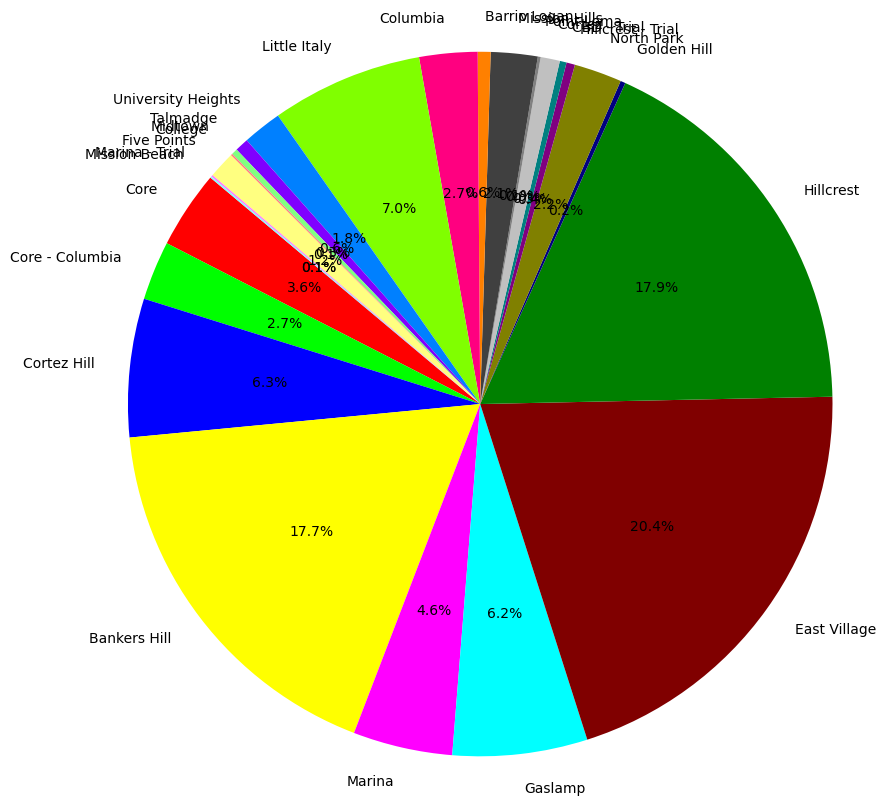

MapView(layout=Layout(height='400px', width='100%'))

In [33]:
# Extract labels, sizes, and colors
labels = list(number_of_poles_percentage.keys())
sizes = list(number_of_poles_percentage.values())
colors = [tuple(map(lambda x: x / 255, color_mapping[label])) for label in labels]

# Create pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

# Connect to your GIS (you may need to provide your own ArcGIS Online account credentials)
gis = GIS()

# Geocode the location of San Diego
location = geocode("San Diego")[0]

# Create a map centered at San Diego's location
san_diego_map = gis.map(location)
for area, poles in points_by_area.items():
    simple_marker_symbol = {
        "type": "esriSMS",
        "style": "esriSMSCircle",
        "color": color_mapping[area],
        "outline": {"color": [255, 255, 255], "width": .5},
        "size" : "5px"
    }

    features = []
    for point_info in poles:
        point_geometry = Point({"x": point_info['long'], "y": point_info['lat']})
        feature= Feature(geometry=point_geometry, attributes= {"ID" : point_info['pole'], "Lat" : point_info['lat'], "Long" : point_info['long'], "Area":point_info['area']})
        features.append(feature)

    # # Create a feature set from the features
    feature_set = FeatureSet(features)
    #print(feature_set.features[0].attributes)

    # # Draw the points on the map with the specified symbol

    san_diego_map.draw(
            shape=feature_set,
            symbol=simple_marker_symbol,
            attributes = feature_set.features,
            popup={
                "title" : "Area",
                "content": "Lat"
            }

        )

san_diego_map.zoom = 13
# Display the map
san_diego_map


# Question 2: Revenue Analysis- How does the total revenue of all san diego parking location change based on year (xxxx - 2023)?  How does the revenue change based on year looking at specific area?

In [25]:
import json

json_file_path = './revenue_analysis/my_list.json'

# Read the JSON file and load its content into a dictionary
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

#print(data)

revenue_area = {}

revenue_area = {
    'Core': 0,
    'Core - Columbia': 0,
    'Cortez Hill': 0,
    'Bankers Hill': 0,
    'Marina': 0,
    'Gaslamp': 0,
    'East Village': 0,
    'Hillcrest': 0,
    'Golden Hill': 0,
    'North Park': 0,
    'Hillcrest - Trial': 0,
    'CBD - Trial': 0,
    'Cortez': 0,
    'Point Loma': 0,
    'Mission Hills': 0,
    'Barrio Logan': 0,
    'Columbia': 0,
    'Little Italy': 0,
    'University Heights': 0,
    'Talmadge': 0,
    'Midtown': 0,
    'College': 0,
    'Five Points': 0,
    'Marina - Trial': 0,
    'Mission Beach': 0
}

# for every area calculate the total area for 2023
for pole_id, info in data.items():
    pole_area = (info['Others']["Area"])
    
    if('2023' in info['YearlyRevenue']):
        pole_rev = (info['YearlyRevenue']['2023']) / 100
        revenue_area[info['Others']["Area"]] = revenue_area[info['Others']["Area"]] + pole_rev
        #print(pole_rev)
        #revenue_area[info['Others']["Area"]] += revenue_area[info['Others']["Area"]] + pole_rev


sorted_items = sorted(revenue_area.items(), key=lambda x: x[1], reverse=True)

# Print the table header
print("{:<20} {:<15}".format('Area', 'Revenue - 2023'))
print("=" * 35)

# Print the table rows
for key, value in sorted_items:
    print("{:<20} {:.2f}".format(key, value))

print("=" * 35)
print("{:<20} {:.2f}".format('Total', sum(revenue_area.values())))

Area                 Revenue - 2023 
East Village         1495490.62
Marina               1073624.86
Hillcrest            1001234.64
Little Italy         886688.69
Bankers Hill         615668.93
Gaslamp              450659.03
Columbia             330448.43
Cortez Hill          269003.47
Core                 259547.02
Mission Hills        167791.65
University Heights   118336.92
Core - Columbia      102262.11
North Park           101628.92
Five Points          97532.90
Cortez               50992.84
Talmadge             17296.28
Barrio Logan         11417.74
College              10019.53
Golden Hill          8895.16
Point Loma           5585.16
Midtown              721.78
Hillcrest - Trial    0.00
CBD - Trial          0.00
Marina - Trial       0.00
Mission Beach        0.00
Total                7074846.68


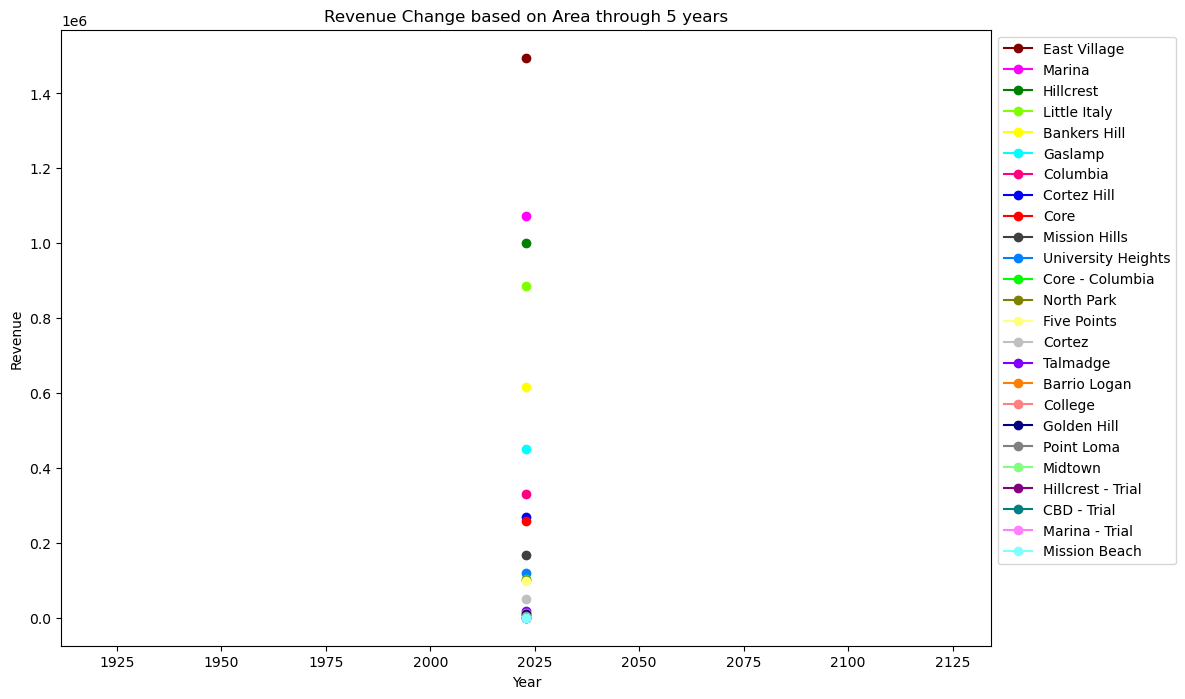

In [35]:
# Sort data based on revenue in descending order
sorted_data = sorted(revenue_area.items(), key=lambda x: x[1], reverse=True)

# Extract names and revenues for plotting
areas = [item[0] for item in sorted_data]
revenues = [item[1] for item in sorted_data]

# Create a line plot
plt.figure(figsize=(12, 8))

for area, revenue in zip(areas, revenues):
    rgb_color = tuple(color / 255 for color in color_mapping[area])
    plt.plot([2023], [revenue], marker='o', label=area, color=rgb_color)

plt.title('Revenue Change based on Area through 5 years')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()